#### Imports

In [369]:
import math
import numpy as np
import matplotlib.pyplot as plt

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


#### File input

In [348]:
with open("input.txt") as fin:
    lcg1Params = map(lambda el: int(el), fin.readline().split())
    lcg2Params = map(lambda el: int(el), fin.readline().split())
    lcg3Params = map(lambda el: int(el), fin.readline().split())

### Constants

In [363]:
big_N = 10 ** 6
small_N = 10 ** 4

### Generators

#### Linear congruential generator

In [349]:
def LCG(module, a, c, seed):
    while True:
        seed = (seed * a + c) % module
        yield seed / float(module)

#### MacLaren-Marsaglia - iterating option

In [350]:
def MMG(moduleX, aX, cX, seedX, moduleY, aY, cY, seedY, k, n):
    randX, randY = LCG(seedX, aX, cX, moduleX), LCG(seedY, aY, cY, moduleY)
    X, Y = [randX.next() for i in range(n + k)], [randY.next() for i in range(n)]
    
    v, result = X[:k], []

    for i in range(n):
        result.append(v[int(Y[i] * k)])
        v[int(Y[i] * k)] = X[k + i]
        
    return result

#### MacLaren-Marsaglia - generator option

In [351]:
def MMG(moduleX, aX, cX, seedX, moduleY, aY, cY, seedY, k):
    randX, randY = LCG(seedX, aX, cX, moduleX), LCG(seedY, aY, cY, moduleY)
    v = [randY.next() for i in range(k)]
    
    while True:
        x, j = randY.next(), int(randX.next() * k)
        res, v[j] = v[j], x
        yield res

### Tests

#### Similar moments test

In [352]:
def similar_moments_test(values):
    delta = 1.96
    n = len(values)
    
    m = sum(values) / float(n)
    sqS = sum([((values[i] - m) ** 2.) for i in range(n)]) / (n - 1.)
    
    ksiM, ksiS = m - .5, sqS - 1. / 12
    
    c1, c2 = math.sqrt(12. * n), ((n - 1.) / n) * ((0.0056 / n + 0.0028 / n ** 2 - 0.0038 / n ** 3) ** -0.5)
    
    return m, sqS, ksiM, ksiS, c1, c2

#### Usage

In [364]:
def logResult(generator, k):
    m, sqS, ksiM, ksiS, c1, c2 = similar_moments_test([generator.next() for i in range(k)])
    stat1 = c1 * abs(ksiM)
    stat2 = c2 * abs(ksiS)
    check_stat = lambda stat: "H0" if stat < 1.96 else "H1"
    
    print """Math Expectation: {} - hypothesis {} 
Dispersion: {} - hypothesis {}\n""".format(stat1, check_stat(stat1), stat2, check_stat(stat2))

def runLoggers(N):
    print "N is {}".format(N)
    [logResult(gen, N) for gen in [lcg1, lcg2, lcg3, mmg]]

lcg1, lcg2, lcg3, mmg = LCG(*lcg1Params), LCG(*lcg2Params), LCG(*lcg3Params), MMG(*(lcg2Params + lcg3Params + [100]))

runLoggers(small_N)
runLoggers(big_N)

N is 10000
Math Expectation: 0.866232835019 - hypothesis H0 
Dispersion: 0.681369536123 - hypothesis H0

Math Expectation: 0.207707289931 - hypothesis H0 
Dispersion: 0.135750556083 - hypothesis H0

Math Expectation: 0.727708262045 - hypothesis H0 
Dispersion: 0.107094819226 - hypothesis H0

Math Expectation: 0.445452526052 - hypothesis H0 
Dispersion: 0.828666543146 - hypothesis H0

N is 1000000
Math Expectation: 9.12305386479 - hypothesis H1 
Dispersion: 6.37363280868 - hypothesis H1

Math Expectation: 0.157771769203 - hypothesis H0 
Dispersion: 0.0134565173735 - hypothesis H0

Math Expectation: 0.45355558834 - hypothesis H0 
Dispersion: 0.40856177693 - hypothesis H0

Math Expectation: 6.73740850103 - hypothesis H1 
Dispersion: 8.46330987438 - hypothesis H1



#### Covariation test

In [354]:
def covariation_test(values):
    delta = 1.96
    bound = 10
    n = len(values)
    
    count_multi = lambda j: sum([values[i] * values[i + j] for i in range(n - j)])
    
    m = float(sum(values) / n)
    r = [1. / 12] + [0 for i in range(bound - 1)]
    _r = [((1. / (n - i - 1)) * count_multi(i) - ((n * m ** 2.) / (n - 1))) for i in range(0, bound)]
    
    h = [math.sqrt(2) * (delta / (12 * math.sqrt(n - 1)))] + [delta / (12 * math.sqrt(n - 1)) for i in range(bound - 1)]
    
    return m, r, _r, h

#### Usage

In [368]:
def logResult(generator, k):
    m, r, _r, h = covariation_test([generator.next() for i in range(k)])
    
    print "-" * 10
    
    for i in range(len(r)):
        print abs(r[i] - _r[i])
    
    print "-" * 10
    print h
    print "-" * 10
    
def runLoggers(N):
    print "N is {}".format(N)
    [logResult(gen, N) for gen in [lcg1, lcg2, lcg3, mmg]]

lcg1, lcg2, lcg3, mmg = LCG(*lcg1Params), LCG(*lcg2Params), LCG(*lcg3Params), MMG(*(lcg2Params + lcg3Params + [100]))

runLoggers(small_N)
runLoggers(big_N)

N is 10000
----------
0.000509954012357
0.0058296017837
0.000615907291655
0.0035362338525
0.00509936421296
0.000957202454294
0.0030194596881
0.00576848681394
0.003471369395
0.0001516862775
----------
[0.0023099976546464293, 0.0016334150061255105, 0.0016334150061255105, 0.0016334150061255105, 0.0016334150061255105, 0.0016334150061255105, 0.0016334150061255105, 0.0016334150061255105, 0.0016334150061255105, 0.0016334150061255105]
----------
----------
0.00010159911338
0.000374783516311
0.000226275916564
0.000271674485373
0.000303844930373
0.000516136724392
0.00012440594648
2.28025839238e-05
0.000108911496951
0.000175649775883
----------
[0.0023099976546464293, 0.0016334150061255105, 0.0016334150061255105, 0.0016334150061255105, 0.0016334150061255105, 0.0016334150061255105, 0.0016334150061255105, 0.0016334150061255105, 0.0016334150061255105, 0.0016334150061255105]
----------
----------
8.01524427969e-05
0.000439881208913
0.000122354842174
0.00101575251864
0.000769010144558
0.00100979912274

#### Pirson test

In [356]:
def pirson_test(values):
    delta = 1073.64
    n, bound = len(values), 1000
    
    n_arr = np.full(bound, 0)
    for i in range(n):
        n_arr[int(values[i] * 1000)] += 1
    
    s = sum([(n_arr[i] - float(n) / bound) ** 2 for i in range(bound)]) / (n / bound)
    
    return s

#### Usage

In [367]:
def logResult(generator, k):
    stat = pirson_test([generator.next() for i in range(k)])

    print stat

def runLoggers(N):
    print "N is {}".format(N)
    [logResult(gen, N) for gen in [lcg1, lcg2, lcg3, mmg]]

lcg1, lcg2, lcg3, mmg = LCG(*lcg1Params), LCG(*lcg2Params), LCG(*lcg3Params), MMG(*(lcg2Params + lcg3Params + [100]))

runLoggers(small_N)
runLoggers(big_N)

N is 10000
50244.0
167.4
941.4
826.2
N is 1000000
5024096.4
145.918
988.272
74440.884


### Plots

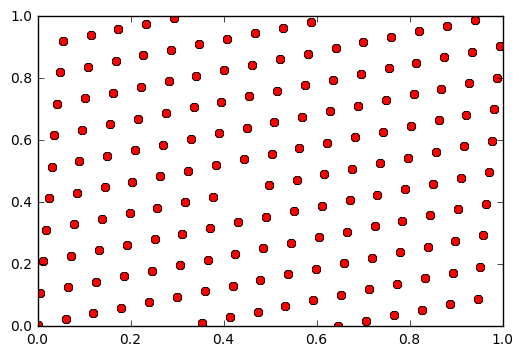

[None]

In [387]:
N = 1000

lcg = LCG(*lcg1Params)
dx = [lcg.next() for i in range(N)]

lcg1, lcg2, lcg3, mmg = LCG(*lcg1Params), LCG(*lcg2Params), LCG(*lcg3Params), MMG(*(lcg2Params + lcg3Params + [100]))

def show_plots (generator):      
    gen_values = [generator.next() for i in range(N + 1)]
    
    dx = gen_values[:-1]
    dy = gen_values[1:]

    plt.plot(dx, dy, 'ro')
    plt.show()
    
[show_plots(gen) for gen in [lcg1]]